# Next 3 minutes (approx.) of your presentation -- Core Analysis
Describe the process how we clean the data // For aaron to edit

#### Exploratory Data Analysis

In [1]:
# Importation of libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Read the data

In [2]:
listings2 = pd.read_csv('datasets/listings_preprocessed.csv')

#### Extract the column headers

In [3]:
# Extract column variable names
column_names = listings2.columns.tolist()

# Print column variable names
print("Column Variable Names:")
for name in column_names:
    print(name)

Column Variable Names:
id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_rate
host_acceptance_rate
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
neighbourhood
latitude
longitude
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
license
calculated_host_listings_count
calculated_hos

In [4]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check if data is categorical or numerical
print(listings2.dtypes)

id                                                    int64
listing_url                                          object
scrape_id                                             int64
last_scraped                                         object
source                                               object
name                                                 object
description                                          object
neighborhood_overview                                object
picture_url                                          object
host_id                                               int64
host_url                                             object
host_name                                            object
host_since                                           object
host_location                                        object
host_about                                           object
host_response_rate                                  float64
host_acceptance_rate                    

In [5]:
# Filter out the data that is not numerical
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])
print(numerical_df.head())

        id       scrape_id   host_id  host_response_rate  \
0    71609  20230329174636    367042          100.000000   
1  4007891  20230329174636  12067440          100.000000   
2  4008423  20230329174636  12067440          100.000000   
3  4017084  20230329174636  20785714           90.420715   
4  4054698  20230329174636  17526618           90.420715   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0            100.000000                    6                         15   
1             97.000000                   17                         25   
2             97.000000                   17                         25   
3             71.145808                    1                          1   
4             71.145808                    5                         13   

   latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0   1.34537  103.95887             6        NaN       2.0   3.0  137.0   
1   1.31172  103.86011             7    

In [6]:
# Count the number of variables in the numerical_df DataFrame
num_vars = numerical_df.shape[1]
print("Number of variables in numerical_df:", num_vars)

Number of variables in numerical_df: 158


#### Perform Correlation Analysis

In [7]:
# importation of libriaries 

import seaborn as sns
import matplotlib.pyplot as plt

#### Corr

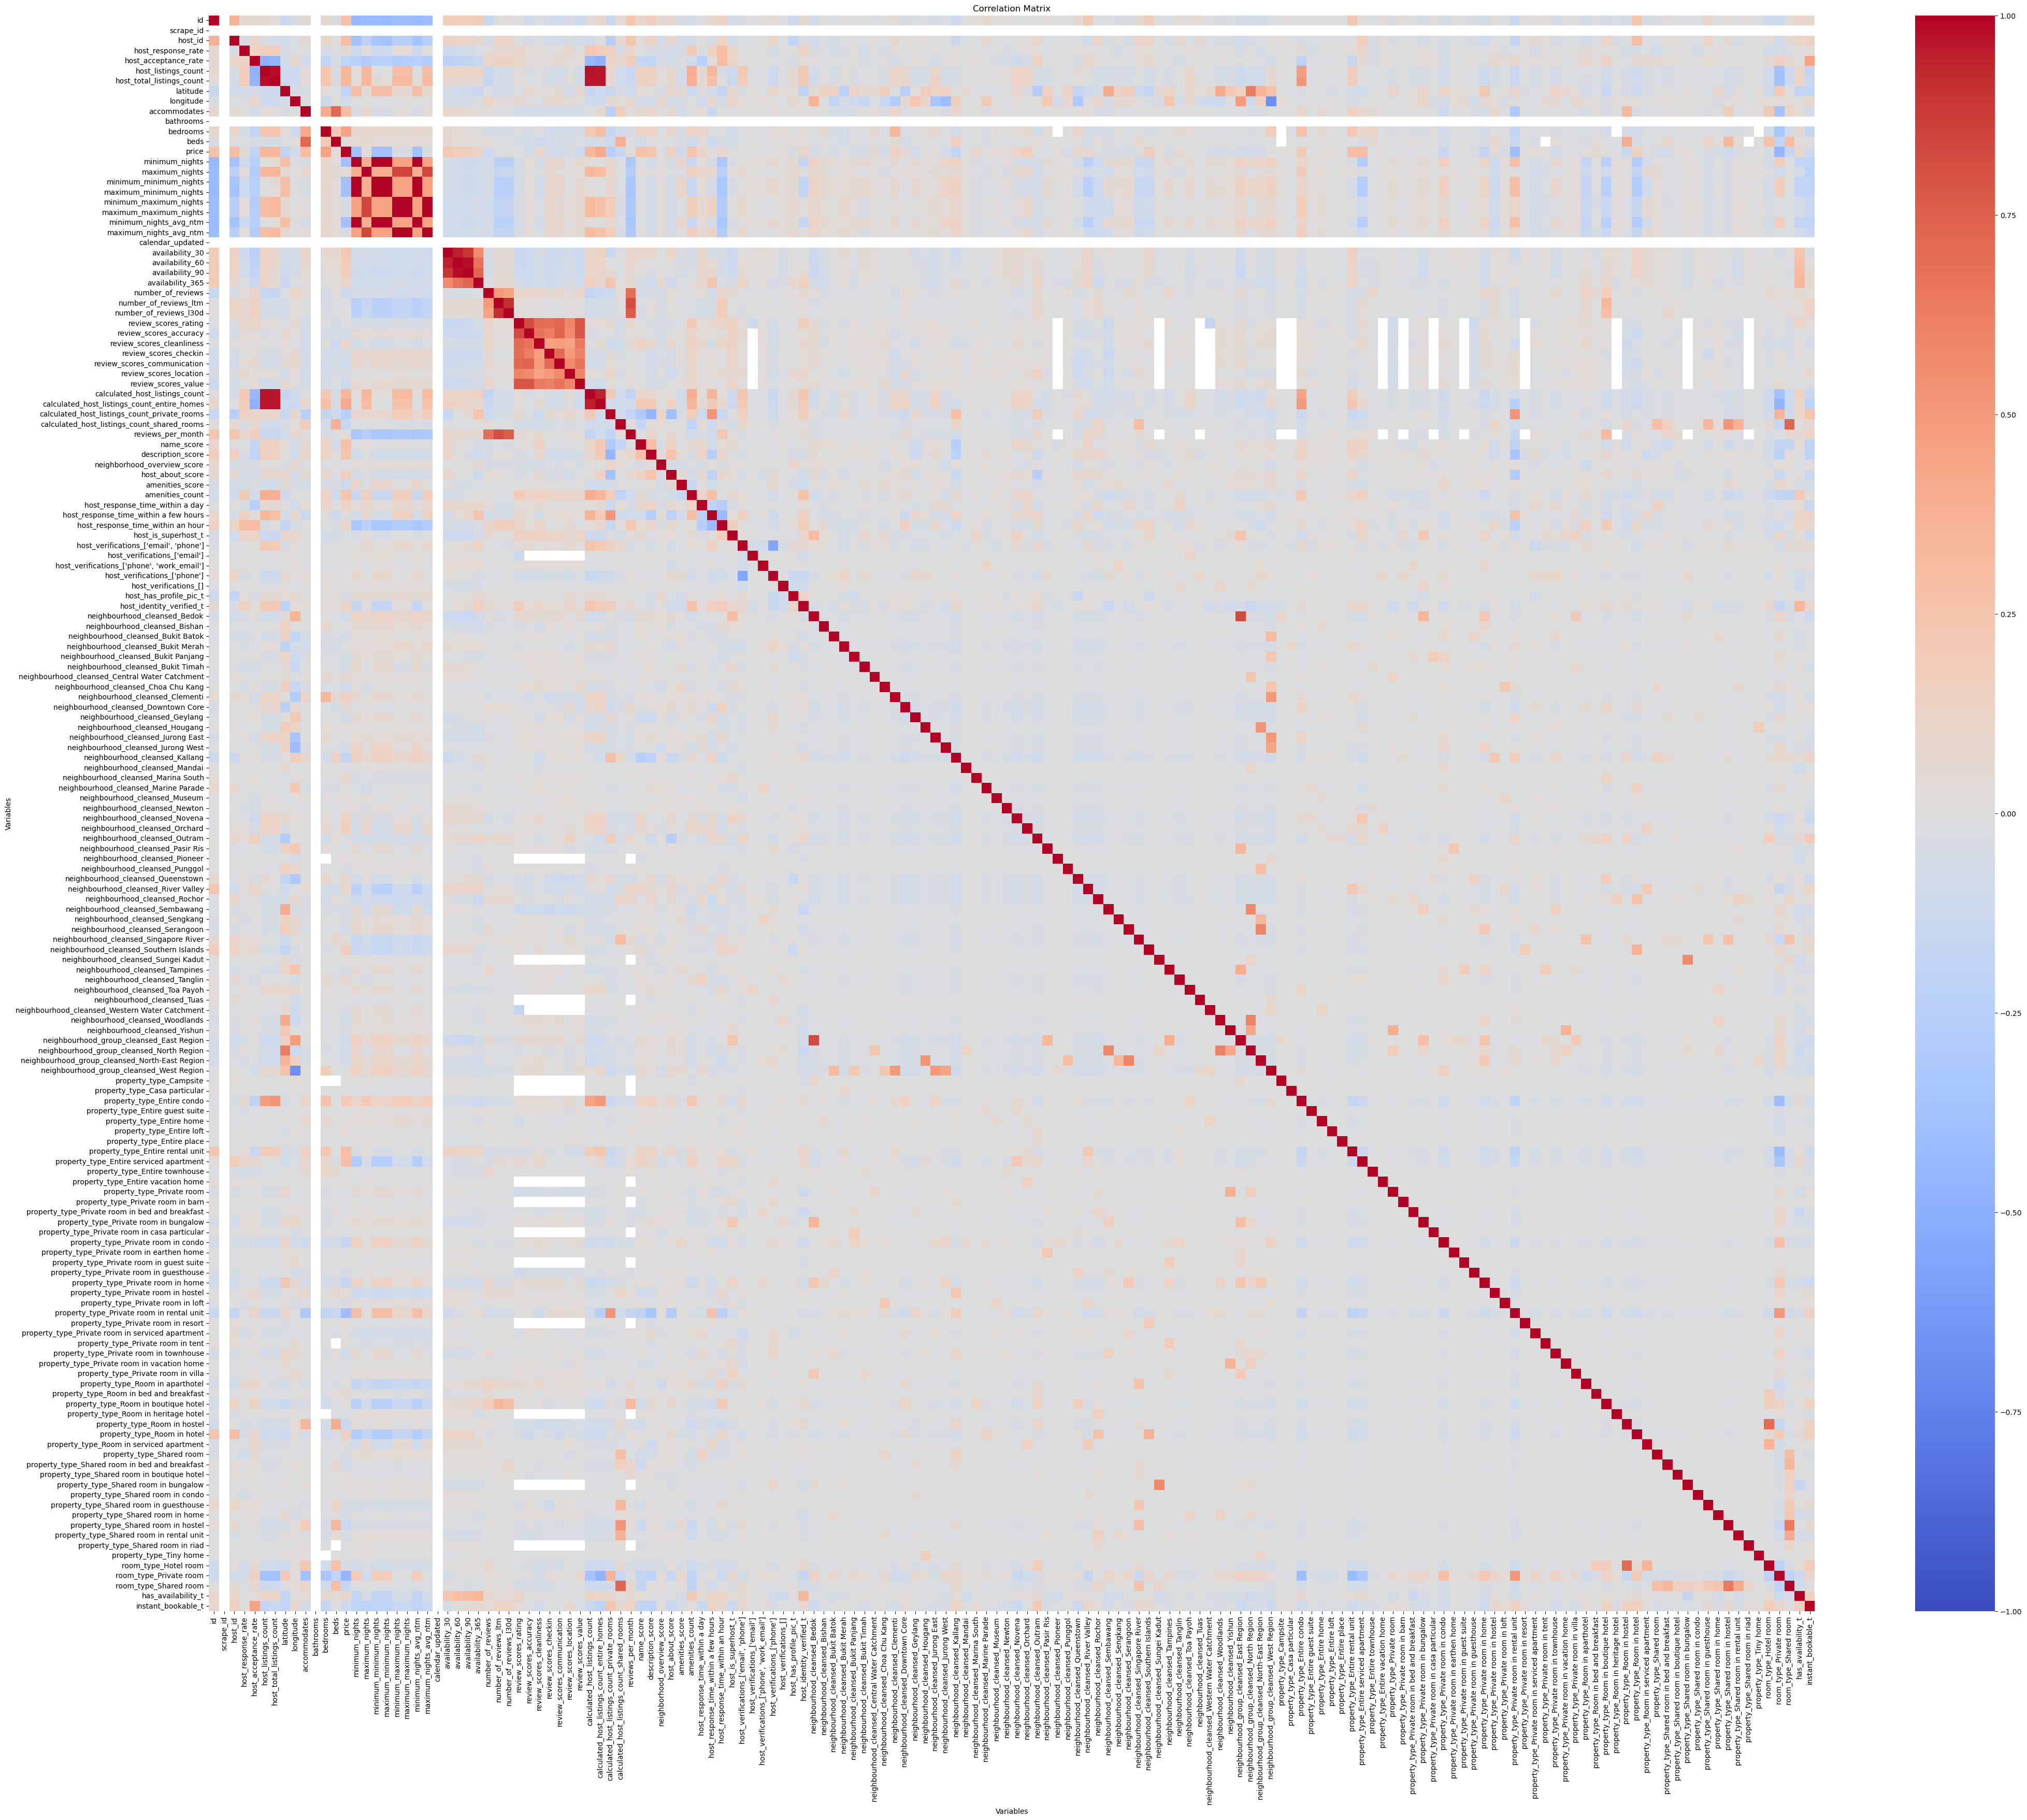

In [8]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Display the correlation matrix
correlation_matrix = numerical_df.corr()
# print(correlation_matrix)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(50, 40))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=False, cmap='coolwarm')

# Set plot title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Save the plot to a file with high resolution
plt.savefig('correlation_matrix.png', dpi=300)

# Show the plot
plt.show()

#### Compare the relationship between the 'price' variable and all other variables

In [9]:
# Compare the relationship between the 'price' variable and all other variables
price_correlations = correlation_matrix.loc['price'].sort_values(ascending=False)
print(price_correlations)

price                                               1.000000
bedrooms                                            0.451534
calculated_host_listings_count_entire_homes         0.417586
host_listings_count                                 0.350427
calculated_host_listings_count                      0.328172
host_total_listings_count                           0.321340
host_id                                             0.301036
accommodates                                        0.299032
property_type_Entire serviced apartment             0.290531
property_type_Entire rental unit                    0.289546
name_score                                          0.272948
id                                                  0.269678
amenities_count                                     0.254952
description_score                                   0.247635
availability_30                                     0.228221
property_type_Entire condo                          0.208911
availability_60         

#### Graph

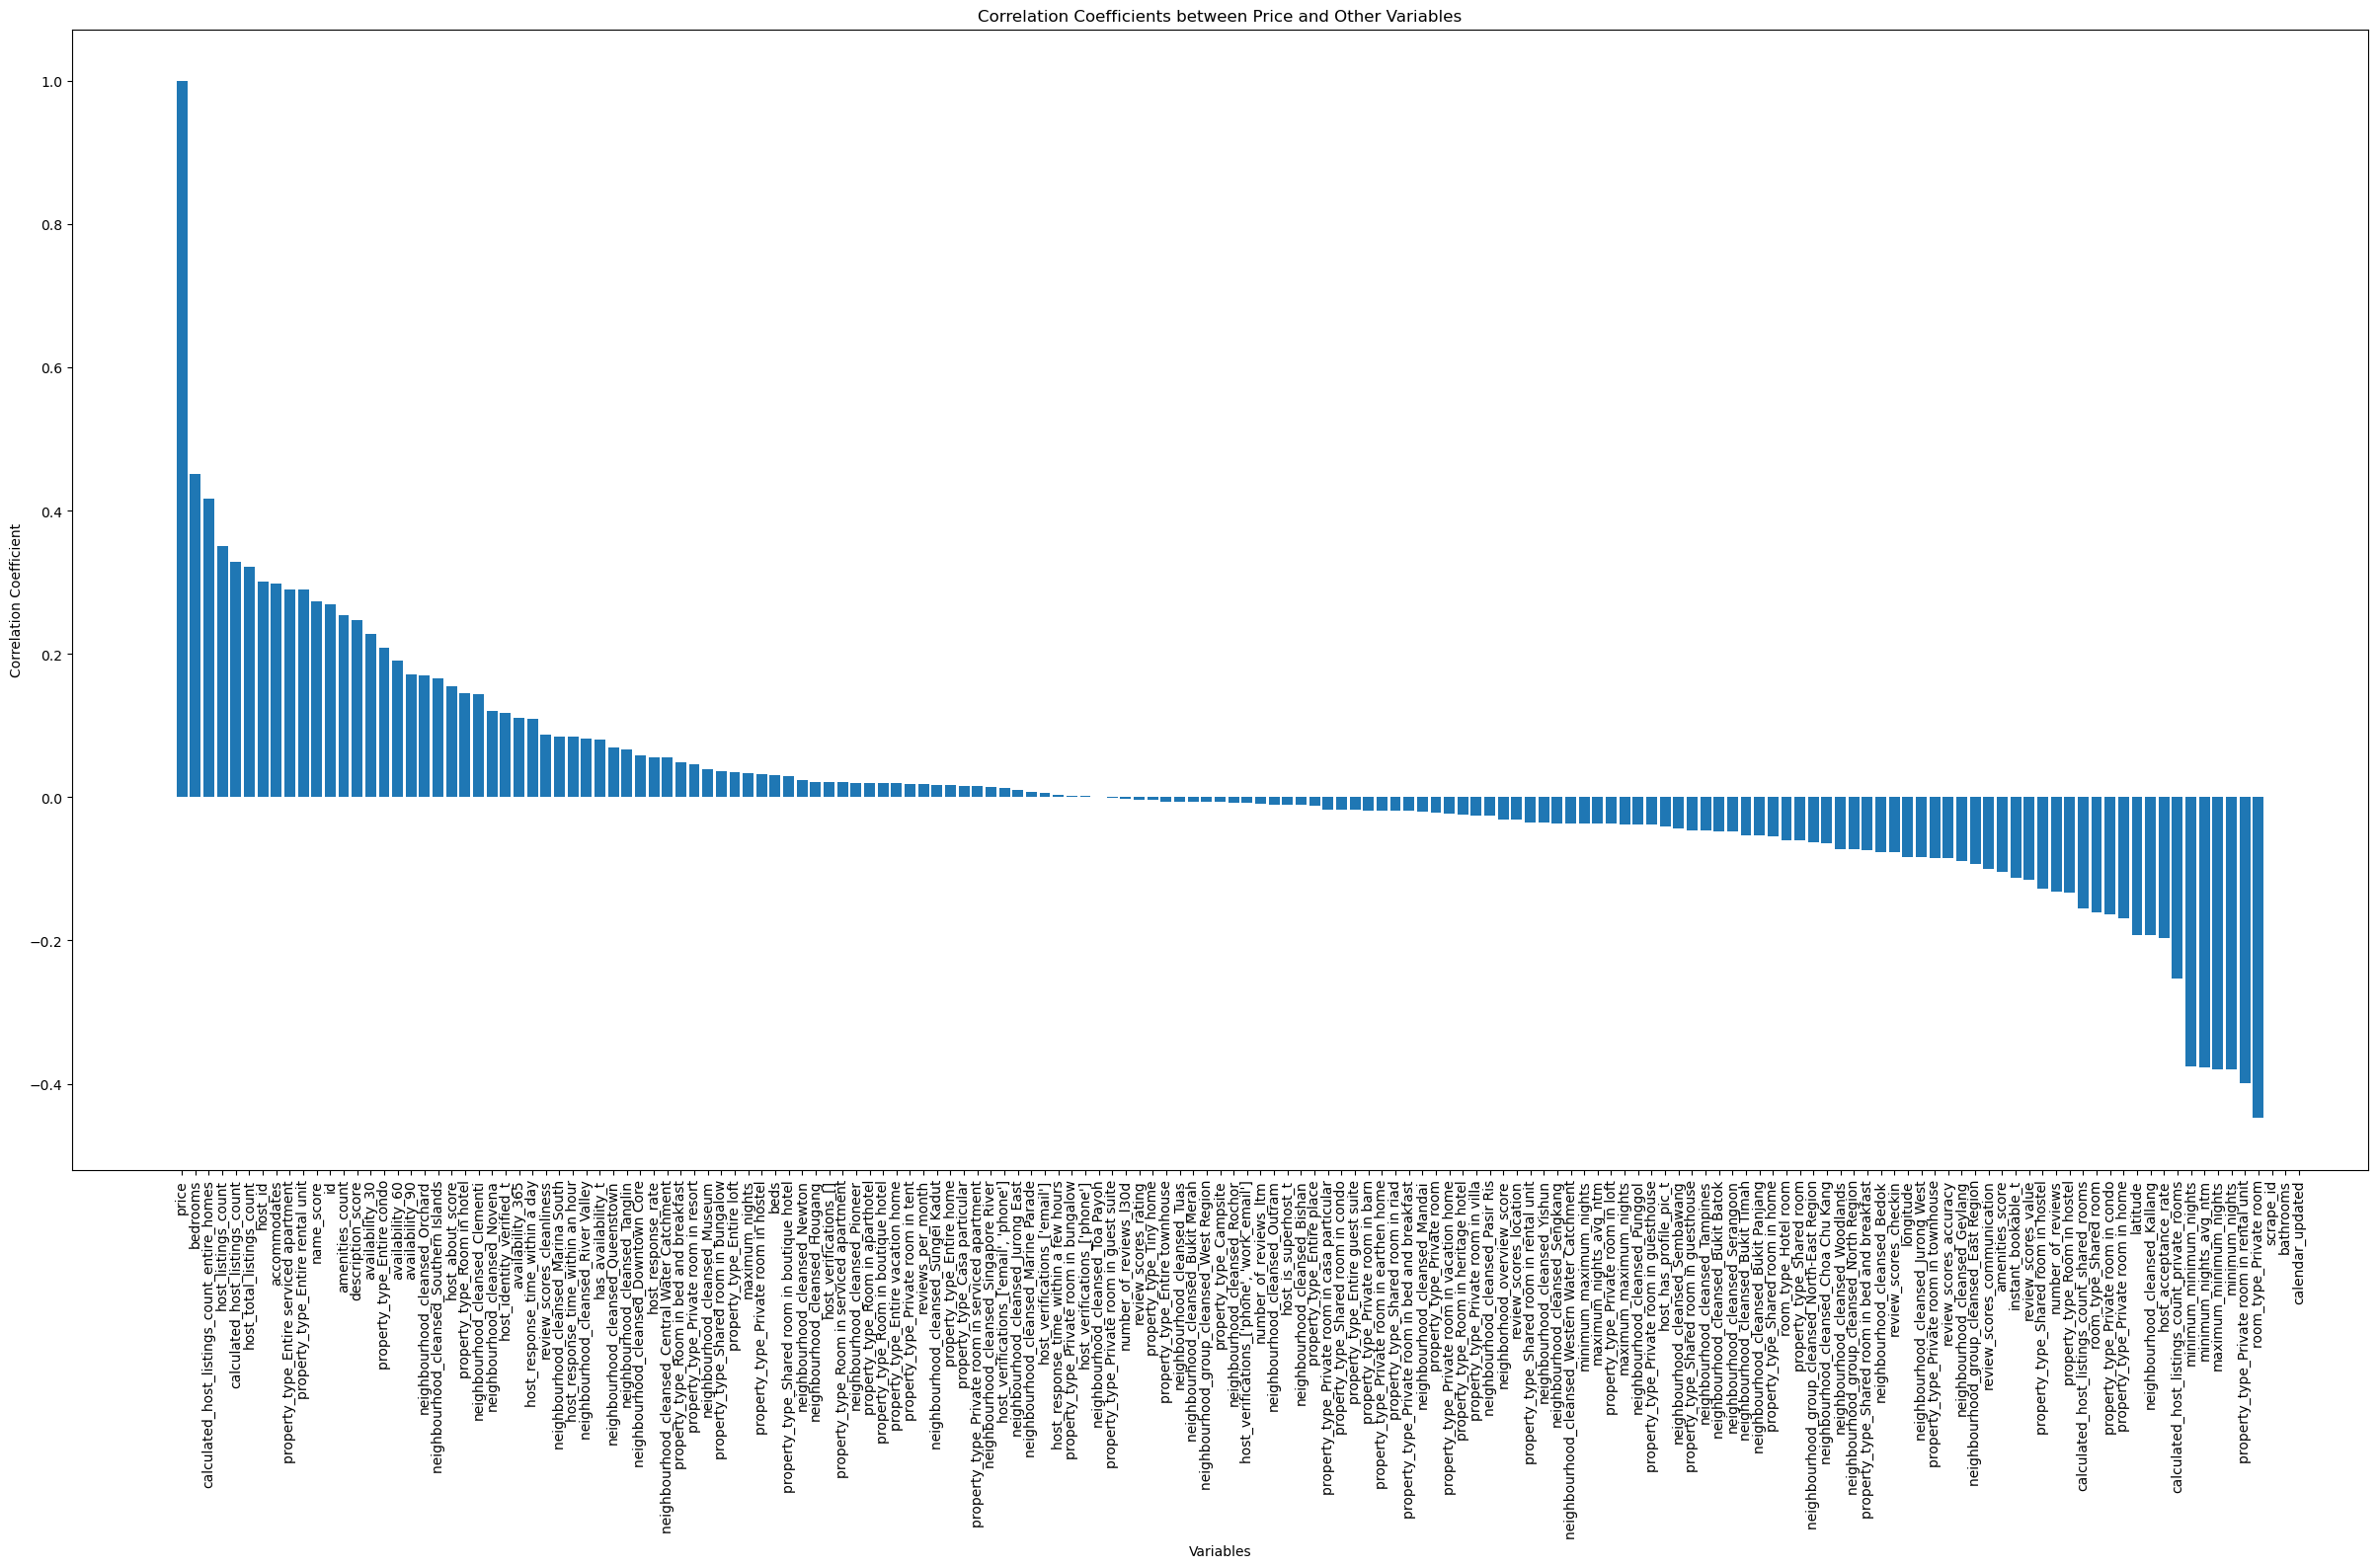

In [10]:
# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Display the correlation matrix
correlation_matrix = numerical_df.corr()

# Compare the relationship between the 'price' variable and all other variables
price_correlations = correlation_matrix.loc['price'].sort_values(ascending=False)

# Create a bar chart of the correlation coefficients
fig, ax = plt.subplots(figsize=(30, 15))
ax.bar(price_correlations.index, price_correlations.values)
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation Coefficients between Price and Other Variables')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Choose the data that have a correlation that is higher than 0.01 using absolute value functions

In [12]:
# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Compute the pairwise correlation between 'price' and all other variables
price_correlations = numerical_df.corrwith(numerical_df['price'])

# Compute the absolute correlation values
abs_price_correlations = price_correlations.abs()

# Select only the variables with an absolute correlation coefficient greater than 0.01
high_abs_correlations = abs_price_correlations[abs_price_correlations > 0.01]

# Display the variables with a high absolute correlation coefficient
print(high_abs_correlations)

id                                                  0.269678
host_id                                             0.301036
host_response_rate                                  0.056236
host_acceptance_rate                                0.196580
host_listings_count                                 0.350427
host_total_listings_count                           0.321340
latitude                                            0.192390
longitude                                           0.082924
accommodates                                        0.299032
bedrooms                                            0.451534
beds                                                0.031353
price                                               1.000000
minimum_nights                                      0.380008
maximum_nights                                      0.033110
minimum_minimum_nights                              0.375274
maximum_minimum_nights                              0.379487
minimum_maximum_nights  

#### Print in descending order and top 20 variables in terms of absolute values

In [13]:
# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Compute the pairwise correlation between 'price' and all other variables
price_correlations = numerical_df.corrwith(numerical_df['price'])

# Select only the variables excluding 'price'
price_correlations = price_correlations[price_correlations.index != 'price']

# Compute the absolute correlation values
abs_price_correlations = price_correlations.abs()

# Sort the absolute correlations in descending order
sorted_abs_correlations = abs_price_correlations.sort_values(ascending=False)

# Display the top 20 variables with the highest absolute correlation coefficient in sorted order
print(sorted_abs_correlations.head(20))


bedrooms                                        0.451534
room_type_Private room                          0.447611
calculated_host_listings_count_entire_homes     0.417586
property_type_Private room in rental unit       0.399308
minimum_nights                                  0.380008
maximum_minimum_nights                          0.379487
minimum_nights_avg_ntm                          0.377291
minimum_minimum_nights                          0.375274
host_listings_count                             0.350427
calculated_host_listings_count                  0.328172
host_total_listings_count                       0.321340
host_id                                         0.301036
accommodates                                    0.299032
property_type_Entire serviced apartment         0.290531
property_type_Entire rental unit                0.289546
name_score                                      0.272948
id                                              0.269678
amenities_count                

#### Store this data into a csv

In [14]:
# Convert the high_correlations Series to a DataFrame and write to a CSV file
high_correlations_df = pd.DataFrame(high_correlations, columns=['correlation'])
high_correlations_df.to_csv('datasets/high_correlations_price.csv')